# Milan Kovacs
## 21308128

In [181]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

df = pd.read_csv('bank.csv')
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [182]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [183]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

We can see there's a lot of missing values, let's explore it

In [184]:
# Deep copy of the dataset
df_original = df.copy()
print(df_original is df)

False


### Mapping

In [185]:
df_original['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

Education has 3 properties, and a nan value

In [186]:
df['job'].unique()

array(['technician', 'retired', 'blue-collar', 'self-employed',
       'services', 'management', 'admin.', 'unemployed', 'student',
       'entrepreneur', 'housemaid', nan], dtype=object)

Job has 11 properties and a nan value. We can map these to integers.

In [187]:
job_mapper = {
    'technician' : 1,
    'retired' : 2,
    'blue-collar' : 3,
    'self-employed' : 4,
    'services' : 5,
    'management' : 6,
    'admin.' : 7,
    'unemployed' : 8,
    'student' : 9,
    'entrepreneur' : 10,
    'housemaid' : 11
}

df['job'] = df_original['job'].map(job_mapper)
df['job']

0        1.0
1        1.0
2        2.0
3        3.0
4        2.0
        ... 
1995     9.0
1996     7.0
1997     2.0
1998     5.0
1999    10.0
Name: job, Length: 2000, dtype: float64

In [188]:
education_mapper = {
    "tertiary": 3,
    "secondary": 2,
    "primary": 1
}

df['education'] = df_original['education'].map(education_mapper)
df['education']

0       3.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1995    NaN
1996    2.0
1997    1.0
1998    1.0
1999    2.0
Name: education, Length: 2000, dtype: float64

In [189]:
df['marital'].unique()

array(['single', 'divorced', 'married'], dtype=object)

In [190]:
marital_mapper = {
    "married": 1,
    "single": 2,
    "divorced": 3
}

df['marital'] = df_original['marital'].map(marital_mapper)
df['marital']

0       2
1       3
2       1
3       1
4       1
       ..
1995    2
1996    2
1997    1
1998    1
1999    1
Name: marital, Length: 2000, dtype: int64

In [191]:
df['contact'].unique()

array(['cellular', 'telephone', nan], dtype=object)

In [192]:
contact_mapper = {
    "cellular": 1,
    "telephone": 2,
}
df['contact'] = df_original['contact'].map(contact_mapper)
df['contact']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    1.0
1996    1.0
1997    2.0
1998    NaN
1999    1.0
Name: contact, Length: 2000, dtype: float64

### Poutcome
According to the site, the success measure of previous marketing campaign.

In [193]:
df_original['poutcome'].unique()


array(['failure', 'other', 'success', nan], dtype=object)

We can see that where `previous` is 0 there is NaN `poutcome`. We can map this to 3, which means that the `poutcome` is unknown because they haven't been contacted.

In [194]:
contact_mapper = {'failure': 1, 'other': 2, 'success': 3, 'unavailable': 4}
df['poutcome'] = df_original['poutcome'].fillna('unavailable')
df['poutcome'] = df['poutcome'].map(contact_mapper)
df['poutcome'].unique()

array([1, 2, 3, 4], dtype=int64)

In [195]:
df['poutcome'].isna().sum()


0

## Filling out the missing values for age, job, education, contact

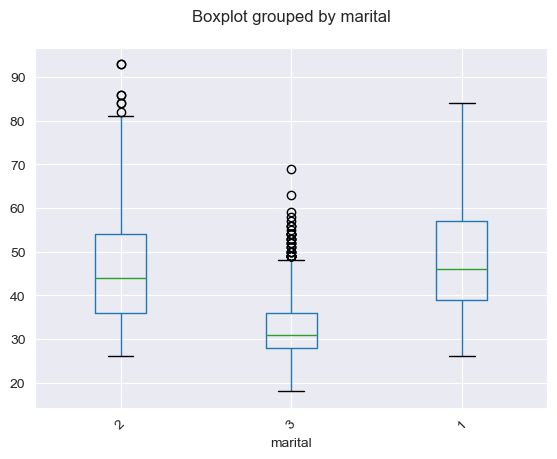

In [196]:
# For age, we can do some filling out given a trend in the box plot
# Let's look at the maritial status and education
boxplot = df.boxplot(column='age', by='marital', rot=45)
boxplot.set_xticklabels(df['marital'].unique())

plt.title("")
plt.show()



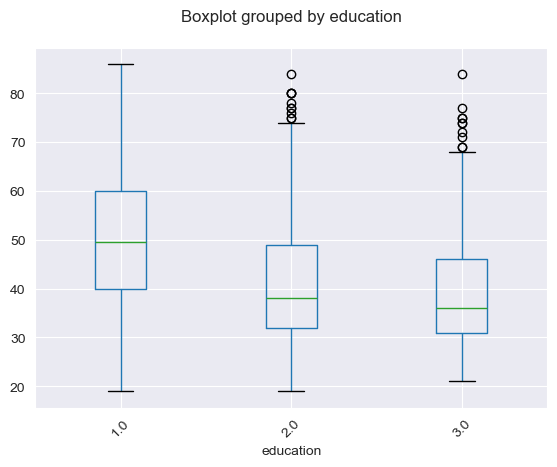

In [197]:
df.boxplot(column='age', by='education', rot=45)
plt.title("")
plt.show()

We can see there's a different median age for both the different education and martial status groups. We impute  the missing values from these groups.

In [198]:
# Impute the missing age from the education and marital status groups
df['age'] = df.groupby(['education', 'marital'])['age'].transform(lambda x: x.fillna(x.median())) # Try eduction and marital status first
df['age'] = df.groupby('marital')['age'].transform(lambda x: x.fillna(x.median())) # Any other remaining missing values with just median of marital status
df['age'].isna().sum()

0

### Imputing education from job

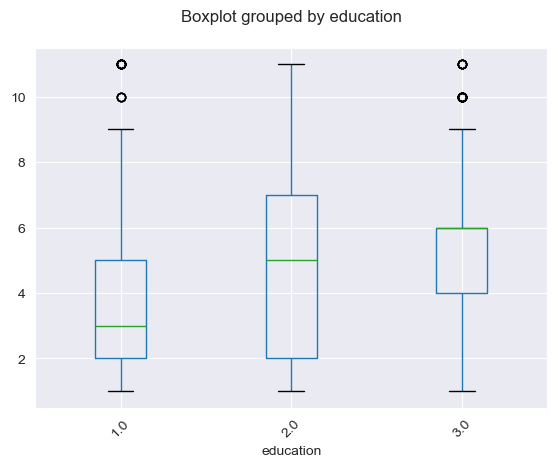

In [199]:
df.boxplot(column='job', by='education', rot=45)
plt.title("")
plt.show()

In [200]:
df['education'].fillna(df.groupby('job')['education'].transform(lambda x: x.median()), inplace=True)
df['education'].fillna(df['education'].median(), inplace=True)
df['education'].isna().sum()

C:\Users\kmila\AppData\Local\Temp\ipykernel_18360\10502919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df.groupby('job')['education'].transform(lambda x: x.median()), inplace=True)
C:\Users\kmila\AppData\Local\Temp\ipykernel_18360\10502919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

0

## Impute job and contact

In [201]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,1.0,2,3.0,no,392,yes,no,1.0,1,apr,957,2,131,2,1,no
1,39.0,1.0,3,2.0,no,688,yes,yes,1.0,1,apr,233,2,133,1,1,no
2,59.0,2.0,1,2.0,no,1035,yes,yes,1.0,1,apr,126,2,239,1,1,no
3,47.0,3.0,1,2.0,no,398,yes,yes,1.0,1,apr,274,1,238,2,1,no
4,54.0,2.0,1,2.0,no,1004,yes,no,1.0,1,apr,479,1,307,1,1,no
5,46.0,4.0,3,3.0,no,926,yes,no,1.0,1,apr,463,1,133,3,1,no
6,34.0,3.0,1,2.0,no,1924,yes,yes,1.0,1,apr,161,2,253,1,1,no
7,45.0,5.0,3,2.0,no,396,yes,yes,1.0,1,apr,251,4,329,4,1,no
8,58.0,6.0,3,3.0,no,315,yes,no,1.0,1,apr,121,2,135,2,1,no
9,49.0,6.0,3,3.0,no,20727,no,no,1.0,1,apr,285,3,132,2,1,no


We will explore the correlation between jobs and housing

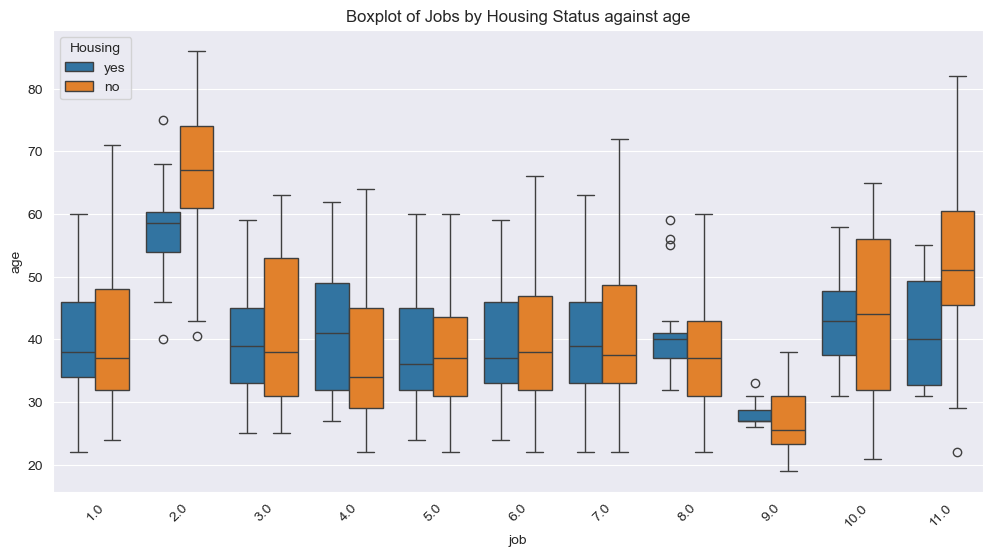

In [202]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='age', hue='housing', data=df)
plt.xticks(rotation=45)
plt.xlabel("job")
plt.ylabel("age")
plt.title("Boxplot of Jobs by Housing Status against age")
plt.legend(title="Housing")
plt.show()


We can see some correlation, not strong, but certain jobs are less likely to have housing.

In [203]:
df['job'] = df.groupby('housing')['job'].transform(lambda x: x.fillna(x.median()))
df['job'].isna().sum()

0

## Contacts
Looking at the `contacts` there appears to nearly be a correlation between `pdays`, meaning that if they weren't contacted we don't know their `contact` method. However, there was a few where they had been contacted. So we will use the age to derive their `contact` method.

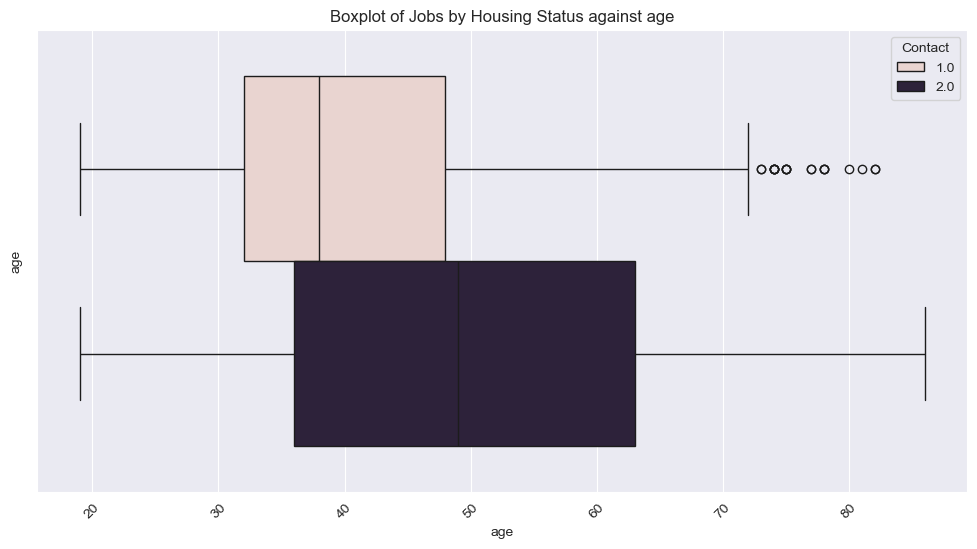

In [204]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', hue='contact', data=df)
plt.xticks(rotation=45)
plt.ylabel("age")
plt.title("Boxplot of Jobs by Housing Status against age")
plt.legend(title="Contact")
plt.show()


We can see that there is a trend in Telephone by elder age groups and cellular with younger.

In [205]:
df['contact'] = df.groupby('age')['contact'].transform(lambda x: x.fillna(x.median()))
df['contact'] = df['contact'].fillna(df['contact'].median())

In [206]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## One Hot Encoding

We will unmap the jobs and marital status to get a meaning name for the one-hot encoding

In [207]:
# Unmap the jobs:
unmapped_jobs = {
   1 : 'technician' ,
   2 : 'retired' ,
   3 : 'blue-collar' ,
   4 : 'self-employed' ,
   5 : 'services' ,
   6 : 'management' ,
   7 : 'admin.' ,
   8 : 'unemployed' ,
   9 : 'student' ,
   10 : 'entrepreneur' ,
   11 : 'housemaid' 
}

df['job'] = df['job'].map(unmapped_jobs)

In [208]:
# Unmap marital status
un_marital_mapper = {
    1: "married",
    2: "single",
     3: "divorced",
}

df['marital'] = df['marital'].map(un_marital_mapper)

In [209]:
# Map the jobs to one hot encoding
df = pd.get_dummies(df, columns=['housing', 'job', 'marital', 'contact', 'poutcome', 'education', 'default', 'loan'], 
                        dummy_na=True, 
                        drop_first=True)
df

,age,balance,day,month,duration,campaign,pdays,previous,subscribed,housing_yes,...,poutcome_4.0,poutcome_nan,education_2.0,education_2.5,education_3.0,education_nan,default_yes,default_nan,loan_yes,loan_nan
0,32.0,392,1,apr,957,2,131,2,no,True,...,False,False,False,False,True,False,False,False,False,False
1,39.0,688,1,apr,233,2,133,1,no,True,...,False,False,True,False,False,False,False,False,True,False
2,59.0,1035,1,apr,126,2,239,1,no,True,...,False,False,True,False,False,False,False,False,True,False
3,47.0,398,1,apr,274,1,238,2,no,True,...,False,False,True,False,False,False,False,False,True,False
4,54.0,1004,1,apr,479,1,307,1,no,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,31.0,2785,16,sep,327,2,-1,0,yes,False,...,True,False,True,False,False,False,False,False,False,False
1996,28.0,127,16,sep,1334,2,-1,0,yes,False,...,True,False,True,False,False,False,False,False,False,False
1997,81.0,1154,17,sep,231,1,-1,0,yes,False,...,True,False,False,False,False,False,False,False,False,False
1998,46.0,4343,20,sep,185,1,-1,0,yes,True,...,True,False,False,False,False,False,False,False,False,False


## Scaling

We will use robust scaler which is less sensitive to outliers

In [210]:
robustScaler = RobustScaler()
df[['balance', 'duration', 'campaign', 'pdays', 'previous']] = robustScaler.fit_transform(df[['balance', 'duration', 'campaign', 'pdays', 'previous']])

<Axes: >

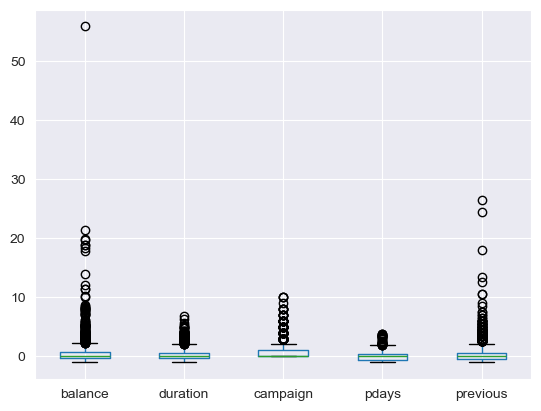

In [211]:
df.boxplot(column=['balance', 'duration', 'campaign', 'pdays', 'previous'])

There is a lot of outliers in the data even after the data is scaled

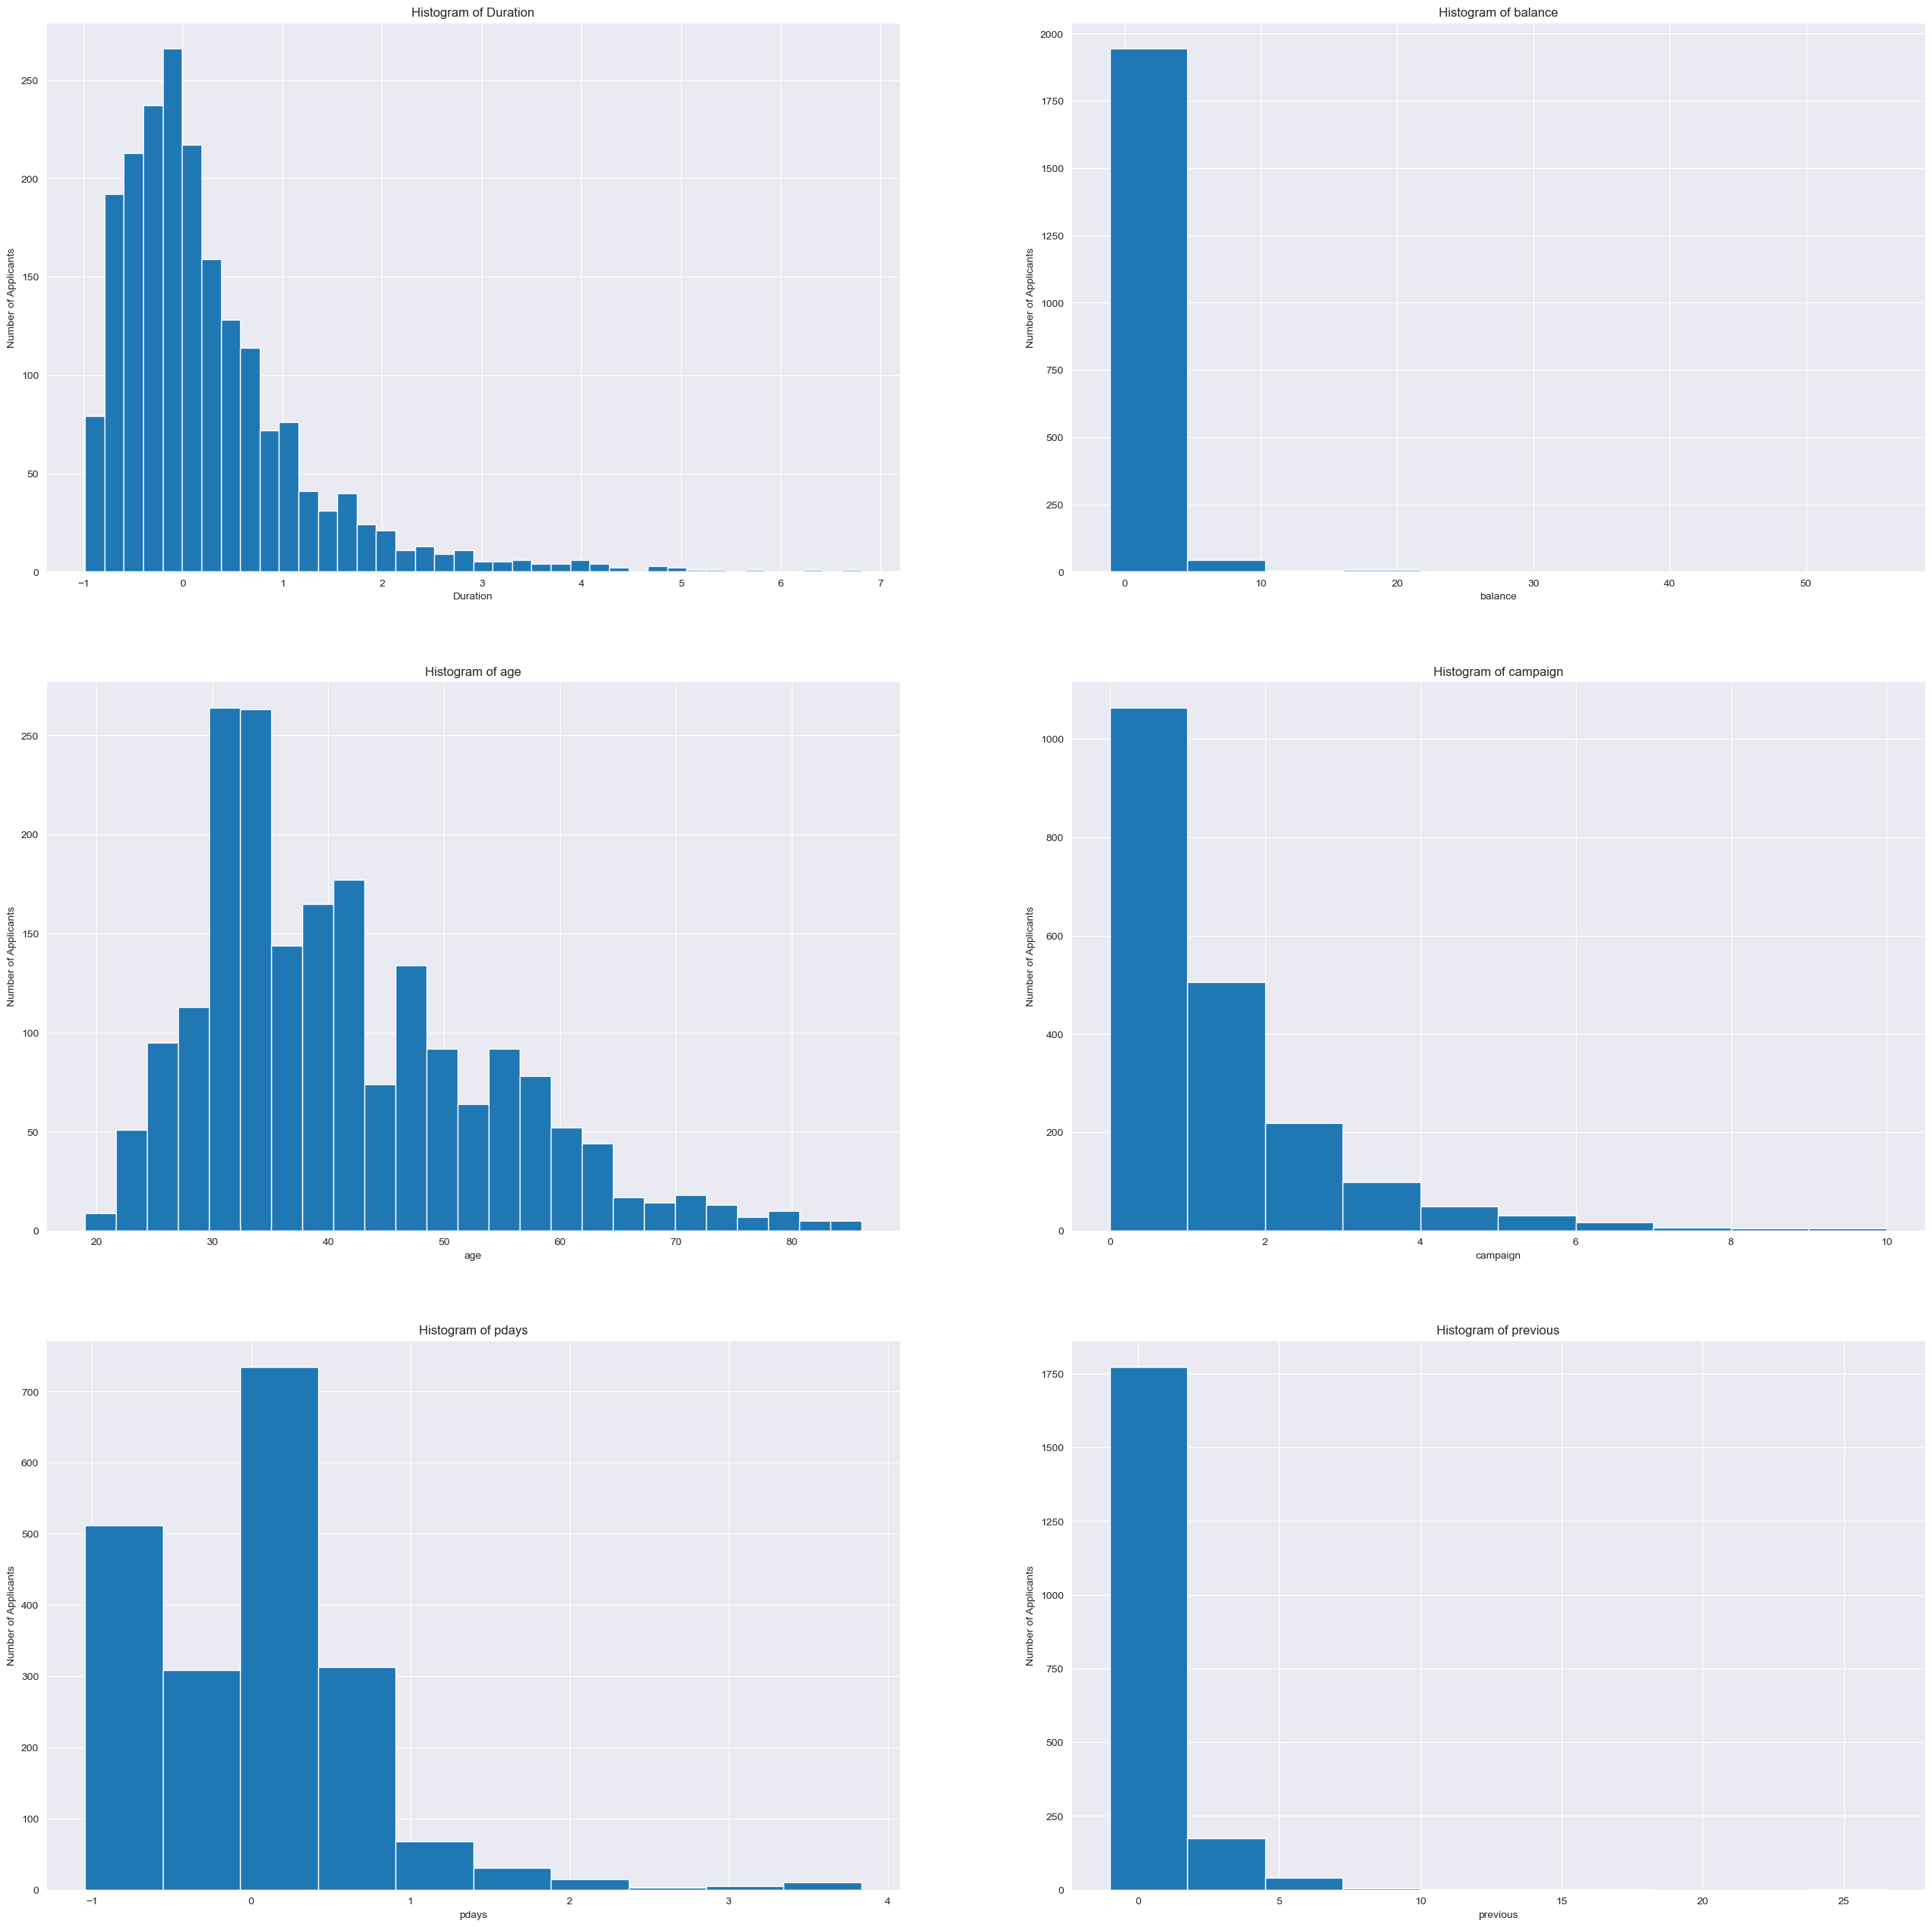

In [212]:
fig = plt.figure(figsize=(32,32))

ax1 = fig.add_subplot(3, 2, 1)
ax1.set_title("Histogram of Duration")
ax1.set_xlabel('Duration')
ax1.set_ylabel('Number of Applicants')
df['duration'].hist(bins=40)

ax2 = fig.add_subplot(3, 2, 2)
ax2.set_title("Histogram of balance")
ax2.set_xlabel('balance')
ax2.set_ylabel('Number of Applicants')
df['balance'].hist()

ax3 = fig.add_subplot(3, 2, 3)
ax3.set_title("Histogram of age")
ax3.set_xlabel('age')
ax3.set_ylabel('Number of Applicants')
df['age'].hist(bins=25)

ax4 = fig.add_subplot(3, 2, 4)
ax4.set_title("Histogram of campaign")
ax4.set_xlabel('campaign')
ax4.set_ylabel('Number of Applicants')
df['campaign'].hist()

ax5 = fig.add_subplot(3, 2, 5)
ax5.set_title("Histogram of pdays")
ax5.set_xlabel('pdays')
ax5.set_ylabel('Number of Applicants')
df['pdays'].hist()

ax6 = fig.add_subplot(3, 2, 6)
ax6.set_title("Histogram of previous")
ax6.set_xlabel('previous')
ax6.set_ylabel('Number of Applicants')
df['previous'].hist()

plt.show()

We can see that most of our data is skewed to the left, even after scaling. This is probably due to the nature of the data We could consider using logarithmic scaling to reduce the skewness of the data.

## New Attribute


Before we can apply log transformation, where the -1 exists we will create a new column called `never_contacted` and its true or false. 

In [213]:
df['never_contacted'] = df['pdays'].apply(lambda x: 1 if x == -1 else 0)
df = pd.get_dummies(df, columns=['never_contacted'], 
                        dummy_na=True, 
                        drop_first=True)

<Axes: >

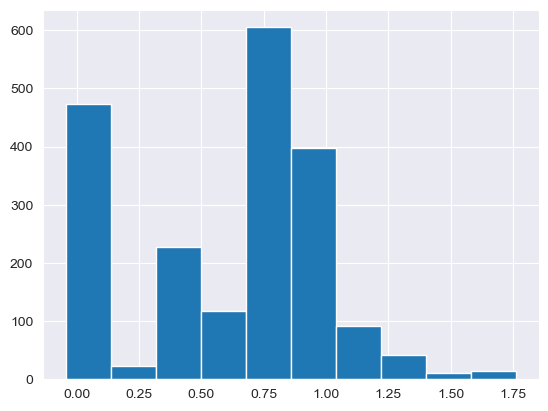

In [214]:
np.log(df['pdays'] + 2).hist()

C:\Users\kmila\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

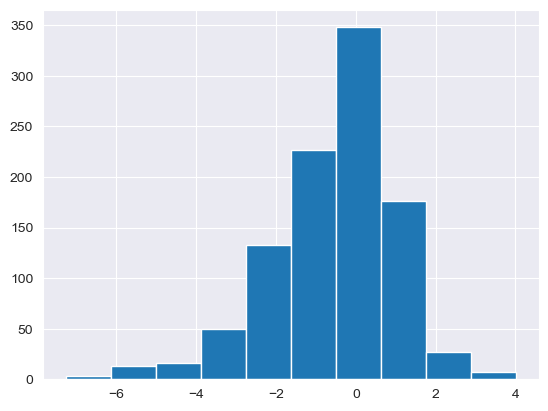

In [215]:
np.log(df['balance']).hist()

<Axes: >

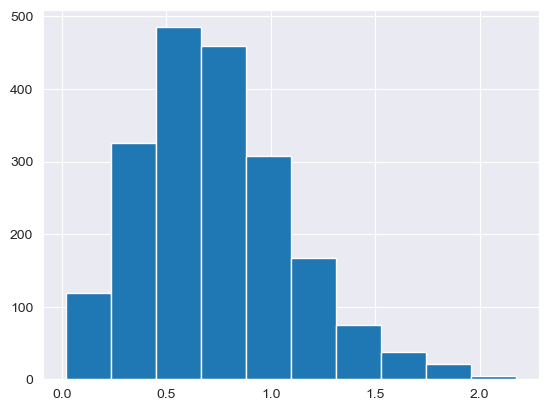

In [216]:
np.log(df['duration'] + 2).hist()

<Axes: >

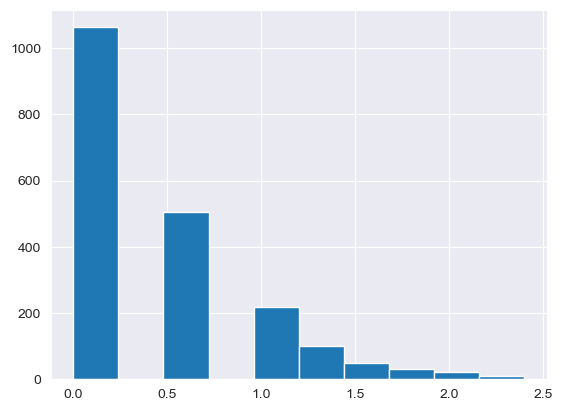

In [217]:
np.log(df['campaign'] + 1).hist()

<Axes: >

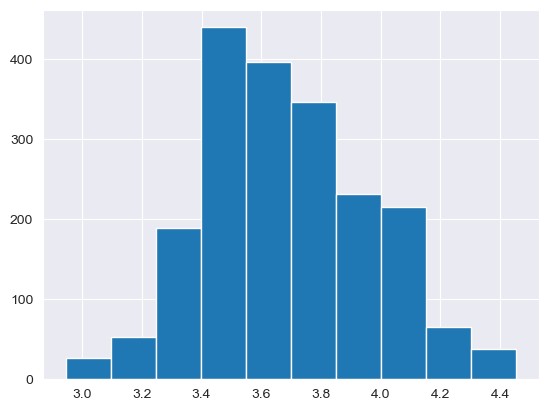

In [218]:
np.log(df['age']).hist()

<Axes: >

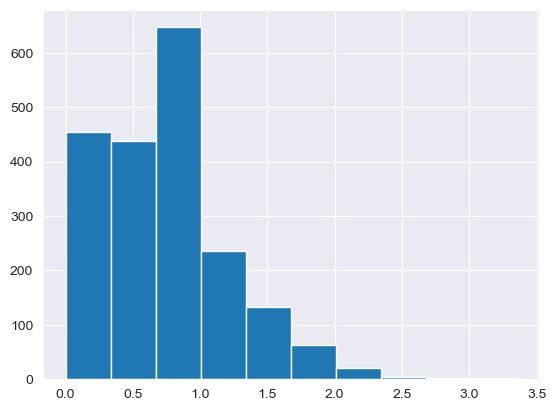

In [219]:
np.log(df['previous'] + 2).hist()

## Save the dataset

In [220]:
df.to_csv('bank_cleaned.csv', index=False)